In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.svm import SVC

# DATA EXPROLATION

In [2]:
train = pd.read_csv('/Users/jokkojja/Downloads/tabular-playground-series-nov-2021/train.csv')
test = pd.read_csv('/Users/jokkojja/Downloads/tabular-playground-series-nov-2021/test.csv')

In [3]:
print(f'train shape -  {train.shape}')
train.head()

train shape -  (600000, 102)


,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [4]:
train.describe().T # есть записи с большой дисперсией, скорее всего нужно будет заскейлить

,count,mean,std,min,25%,50%,75%,max
id,600000.0,299999.500000,173205.225094,0.00000,149999.750000,299999.500000,449999.250000,599999.00000
f0,600000.0,0.306508,0.522450,-3.79745,0.026222,0.097788,0.397184,8.78150
f1,600000.0,2.497590,1.554018,-1.22396,1.186237,2.516500,3.787630,6.22672
f2,600000.0,306.644536,551.743893,-1842.53000,43.573400,133.626000,302.262250,6119.28000
f3,600000.0,2.647901,1.544529,-1.36856,1.442028,2.634130,3.907640,6.52115
...,...,...,...,...,...,...,...,...
f96,600000.0,2.547853,1.558427,-1.58474,1.247888,2.601940,3.820665,6.25436
f97,600000.0,2.590159,1.525091,-1.25473,1.348078,2.682090,3.839520,6.14530
f98,600000.0,0.158881,0.436190,-3.99350,0.013536,0.058058,0.110718,10.76700
f99,600000.0,0.123048,0.264896,-2.78338,0.018105,0.058471,0.104872,5.98811


In [5]:
train.isna().sum().unique() # нет nan значений

array([0])

In [6]:
train.target.unique() # бинарная классификация

array([0, 1])

/Users/jokkojja/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


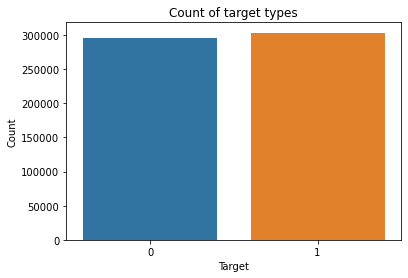

In [21]:
sns.countplot(train.target) # сбалансированный датасет
plt.title('Count of target types')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

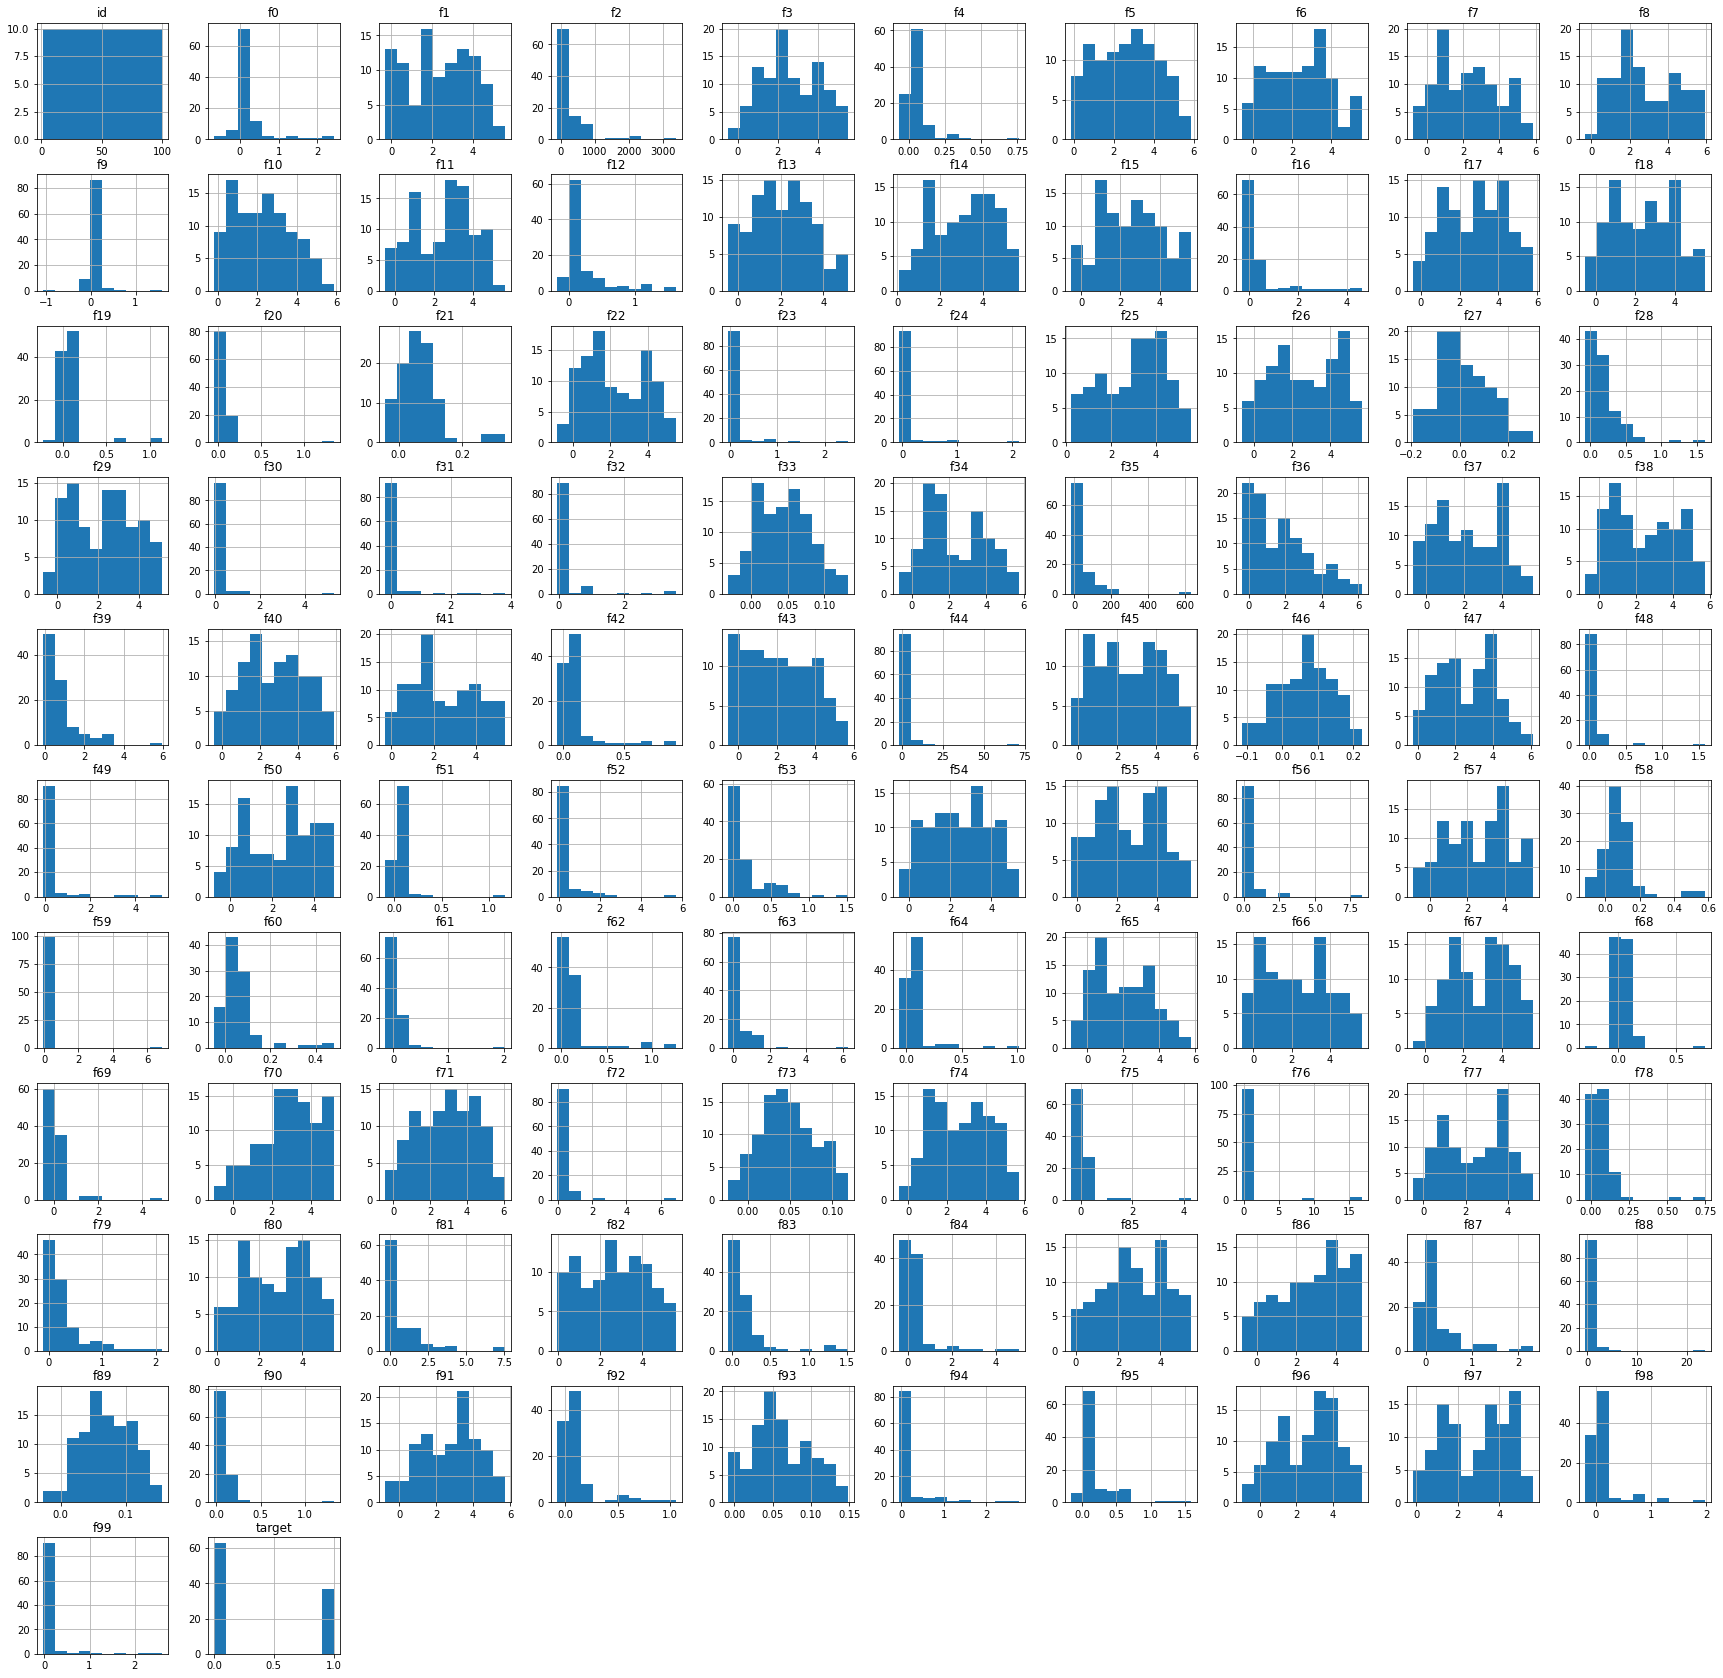

In [22]:
train[1:101].hist(figsize = (30, 30)) #бимодальное распределение в большинстве случаев
plt.show()

<AxesSubplot:>

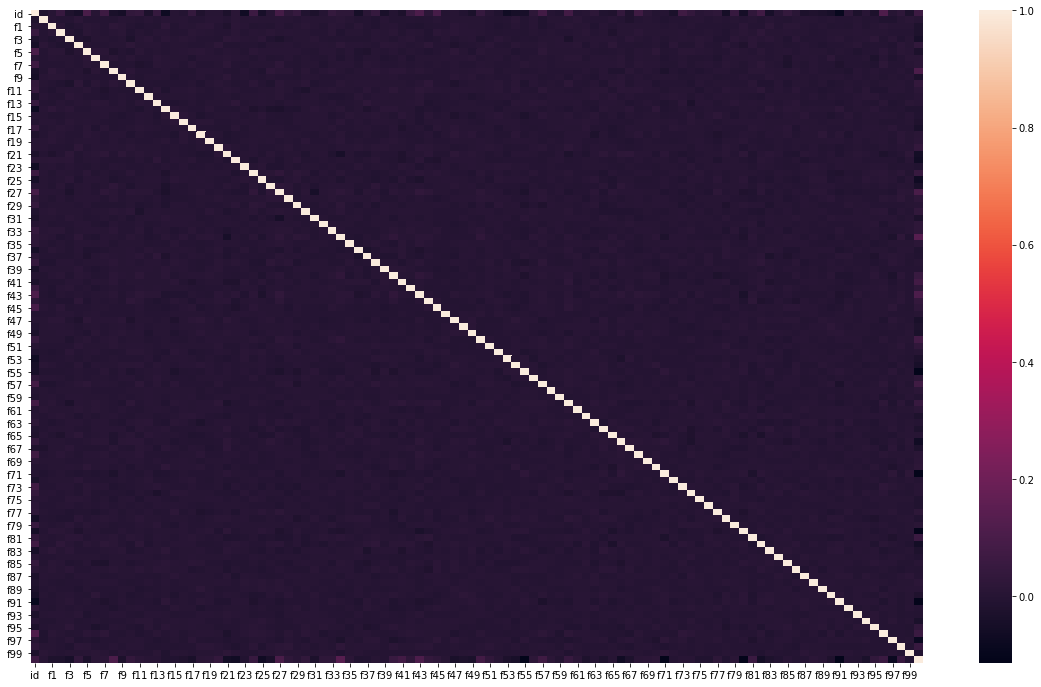

In [23]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = False) #средней и сильной корреляции нет

# BASELINE

In [24]:
X = train.drop(['id', 'target'], axis = 1)
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [28]:
# sc = dabl.SimpleClassifier().fit(X_train, y_train)
# sc.score(X_test, y_test)
# sc.log_
simple_clf = DecisionTreeClassifier()
baseline = np.mean(cross_val_score(simple_clf, X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
#базовое значение простого классификатора без настройки гипер параметров на кросс валидации

In [29]:
print(f'roc auc score baseline - {baseline}')

roc auc score baseline - 0.551971609118131


In [30]:
# сделать пайплайны и протестить все модели классификации со всеми скейлерами

# MODELING
* Можно будет попробовать стекинг трех лучших моделей

## RandomForestClassifier

In [39]:
# Подбор оптимальных гиперпараметров для модели GridSearchCV
# Подойдет ли для других моделей тот же скейлер с лучшим скором??????

In [40]:
rndf_clf = RandomForestClassifier()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', rndf_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', rndf_clf)])
robust_pipeline = Pipeline([('robust_scaler', RobustScaler()), ('model', rndf_clf)])
quantile_pipeline = Pipeline([('quantile_transformer', QuantileTransformer()), ('model', rndf_clf)])

In [41]:
pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline,
    'robust' : robust_pipeline,
    'quantile' : quantile_pipeline
    
}
random_forest_score_list = {}

In [42]:

for key, pipe in pipeline_dict.items():
    cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
    random_forest_score_list[key] = cv_scores
    print(f"mean roc auc score: {cv_scores}, for scaler {key}")
print(random_forest_score_list)    
# StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

mean roc auc score: 0.7046351561264743, for scaler standart
mean roc auc score: 0.7042585191292697, for scaler min_max
mean roc auc score: 0.7043283775054627, for scaler robust
mean roc auc score: 0.704078018907422, for scaler quantile
{'standart': 0.7046351561264743, 'min_max': 0.7042585191292697, 'robust': 0.7043283775054627, 'quantile': 0.704078018907422}


## GradientBoostingClassifier

In [43]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss = 'deviance',\
                                           criterion = 'mse')
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', grad_boost_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', grad_boost_clf)])
robust_pipeline = Pipeline([('robust_scaler', RobustScaler()), ('model', grad_boost_clf)])
quantile_pipeline = Pipeline([('quantile_transformer', QuantileTransformer()), ('model', grad_boost_clf)])

In [44]:
pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline,
    'robust' : robust_pipeline,
    'quantile' : quantile_pipeline
    
}
grad_boost_score_list = {}

In [45]:
for key, pipe in pipeline_dict.items():
    cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
    grad_boost_score_list[key] = cv_scores
    print(f"mean roc auc score: {cv_scores}, for scaler {key}")
print(grad_boost_clf)    
# StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

mean roc auc score: 0.7181639354822084, for scaler standart
mean roc auc score: 0.7182426520869855, for scaler min_max
mean roc auc score: 0.7181639239246554, for scaler robust
mean roc auc score: 0.7181638882641764, for scaler quantile
{'standart': 0.7046351561264743, 'min_max': 0.7042585191292697, 'robust': 0.7043283775054627, 'quantile': 0.704078018907422}


## KNeighborsClassifier

In [48]:
k_neigh_clf = KNeighborsClassifier()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', k_neigh_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', k_neigh_clf)])
robust_pipeline = Pipeline([('robust_scaler', RobustScaler()), ('model', k_neigh_clf)])
quantile_pipeline = Pipeline([('quantile_transformer', QuantileTransformer()), ('model', k_neigh_clf)])

In [49]:
pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline,
    'robust' : robust_pipeline,
    'quantile' : quantile_pipeline
    
}
k_neigh_score_list = {}

In [50]:
for key, pipe in pipeline_dict.items():
    cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
    k_neigh_score_list[key] = cv_scores
    print(f"mean roc auc score: {cv_scores}, for scaler {key}")
print(k_neigh_score_list)

mean roc auc score: 0.6008692868710812, for scaler standart


KeyboardInterrupt: 

## LogisticRegression

In [ ]:
log_reg_clf = LogisticRegression()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', log_reg_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', log_reg_clf)])
robust_pipeline = Pipeline([('robust_scaler', RobustScaler()), ('model', log_reg_clf)])
quantile_pipeline = Pipeline([('quantile_transformer', QuantileTransformer()), ('model', log_reg_clf)])

In [ ]:
pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline,
    'robust' : robust_pipeline,
    'quantile' : quantile_pipeline
    
}
log_reg_clf_score_list = {}

In [ ]:
for key, pipe in pipeline_dict.items():
    cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
    log_reg_clf_score_list[key] = cv_scores
    print(f"mean roc auc score: {cv_scores}, for scaler {key}")
print(log_reg_clf_score_list)

## GaussianNB 

In [ ]:
gauss_clf = GaussianNB()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', gauss_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', gauss_clf)])
robust_pipeline = Pipeline([('robust_scaler', RobustScaler()), ('model', gauss_clf)])
quantile_pipeline = Pipeline([('quantile_transformer', QuantileTransformer()), ('model', gauss_clf)])

In [ ]:
pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline,
    'robust' : robust_pipeline,
    'quantile' : quantile_pipeline
    
}
gauss_clf_score_list = {}

In [ ]:
for key, pipe in pipeline_dict.items():
    cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = -1))
    gauss_clf_score_list[key] = cv_scores
    print(f"mean roc auc score: {cv_scores}, for scaler {key}")
print(gauss_clf_score_list)

## SVC